# Distribución de probabilidad Binomial
1. Una distribución de probabilidad es una distribución que indica la probabilidad de cada valor de la variable aleatoria. 
2. A menudo se expresa como gráfica, tabla o fórmula.
3. Una distribución de probabilidad es como una distribución de frecuencias, 
    + en dónde la frecuencia o valor correspondiente a cada valor de x es un valor de probabilidad.
###### Ver Distribución discreta de probabilidad binomial en: https://www.chreinvent.com/recursos/distribuci%C3%B3n-binomial    

In [26]:
import math
from statistics import mean, median, mode, variance, stdev
from itertools import accumulate
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import binom

## Muestreo de aceptación
La compañía Medassist Pharmaceutical Company recibe grandes embarques de tabletas de aspirina y usa el siguiente plan de muestreo de aceptación: seleccionar al azar y probar 24 tabletas, después aceptar el grupo completo sólo si hay una o cero tabletas que no cumplan con las especificaciones requeridas. 
+ Si un embarque particular de miles de tabletas de aspirina tiene en realidad una tasa de defectos del 4%, ¿cuál es la probabilidad de que el embarque completo sea aceptado?


### Parametros

In [ ]:
# Definición de parámetros del problema
n = 10   # Número de tabletas
p = 0.2  # Probabilidad de ser seleccionado
x = [ x for x in range(n+1)] # x varia de 0 a 6

### Construcción de la distribución binomial

In [28]:
# Calculo de la distribución de probabilidad binomial
# Lista con las probabilidades simples para cada x
d_prob = [binom.pmf(x, n, p) for x in range(n + 1)]

# Lista con las probabilidades acumuladas para cada x
d_prob_ac = list(accumulate(d_prob))

# Lista con las probabilidades acumuladas en orden inverso
d_prob_ac_inv = list(accumulate(d_prob[::-1]))[::-1]

# Imprimir cada número con dos decimales usando f-string # for num in dist_prob_ac: print(f"{num:.2f}")

### Tabla y Gráficos
+ Probabilidades: La suma de la probabilidad debe dar 1
+ Media: La suma-producto de x por su probabilidad debe dar la media
+ Varianza: La suma-producto de x al cuadrado por la probabilidad menos la media debe dar la varianza
+ Desviación Estandard: La raiz cuadrada de la varianza debe dar la desviación estandard

        p    x.p   xx.p  p-acu  p-acr
x                                    
0   0.107  0.000  0.000  0.107  1.000
1   0.268  0.268  0.268  0.376  0.893
2   0.302  0.604  1.208  0.678  0.624
3   0.201  0.604  1.812  0.879  0.322
4   0.088  0.352  1.409  0.967  0.121
5   0.026  0.132  0.661  0.994  0.033
6   0.006  0.033  0.198  0.999  0.006
7   0.001  0.006  0.039  1.000  0.001
8   0.000  0.001  0.005  1.000  0.000
9   0.000  0.000  0.000  1.000  0.000
10  0.000  0.000  0.000  1.000  0.000

Estadísticos:
Sumatoria de probabilidades: 0.9999999999999999
Media y Esperanza          : 1.999999999999999
Varianza                   : 1.600
Desviación Estandard       : 1.265
Revisión de estadísticos por scipy:
mean: 2.00, var: 1.60, skew: 0.47, kurt: 0.02.


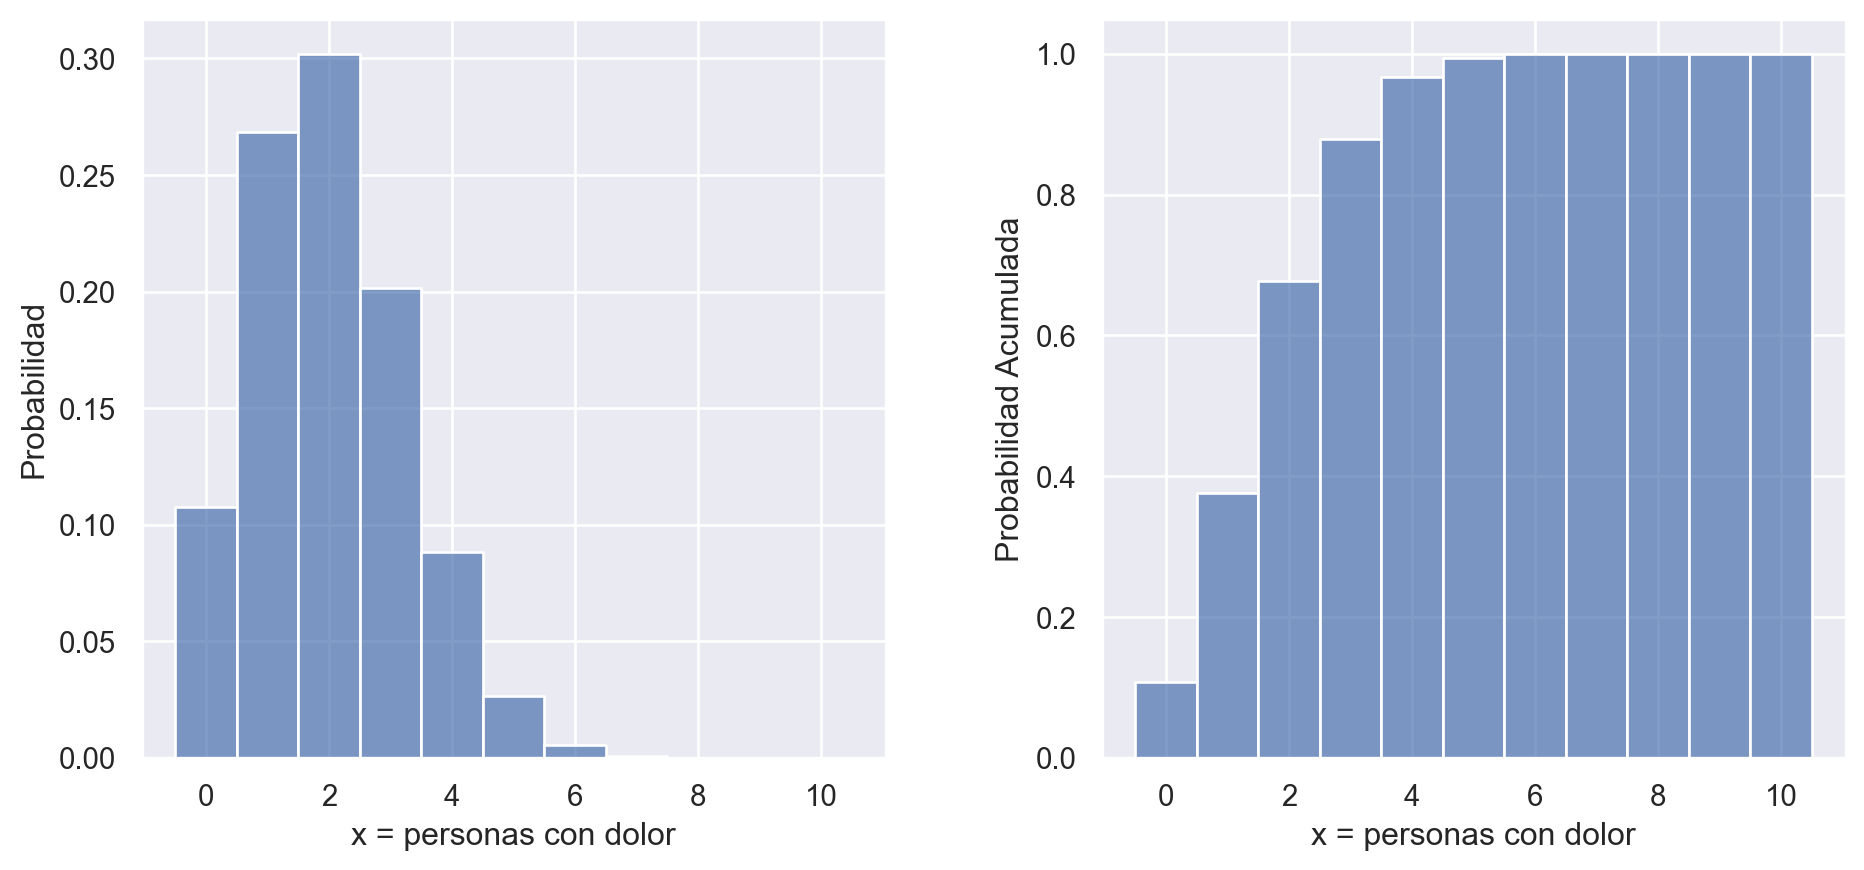

In [29]:
# Dataframe: Tabla de datos
df_tv = pd.DataFrame(
    {
        'x': x,
        'p': d_prob,
        'x.p': [x[i] * d_prob[i] for i in range(n+1)],
        'xx.p': [x[i]**2 * d_prob[i] for i in range(n+1)],
        'p-acu': d_prob_ac,
        'p-acr': d_prob_ac_inv      
    }
)
print(df_tv.round(3).set_index('x'))

# Estadisticos: Calculo de la media de la distribución de probabilidad
print(f"\nEstadísticos:")

# Calculos: sumatoria de probabilidades, media, varianza y desviación estandard
sumprob = df_tv.p.sum()
media = df_tv['x.p'].sum()
sum_xx_p = df_tv['xx.p'].sum()
varianza = sum_xx_p - media ** 2
desvstan = math.sqrt(varianza)

# Impresión de estadísticos
print(f"Sumatoria de probabilidades: {sumprob}")
print(f"Media y Esperanza          : {media}")
print(f"Varianza                   : {varianza:.3f}")
print(f"Desviación Estandard       : {desvstan:.3f}")

# Revisión de estadísticos por Scipy
# La función de distribución binomial de SciPy binom.stats devuelve: Los momentos de primero a cuarto orden:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

print("Revisión de estadísticos por scipy:")
print(f"mean: {mean:.2f}, var: {var:.2f}, skew: {skew:.2f}, kurt: {kurt:.2f}.")

# Gráficos
# Distribución de probabilidad binomial
f = mpl.figure.Figure(figsize=(10, 5))
sf1, sf2 = f.subfigures(1, 2)
# Visualización con Seaborn Objects
# Crear la figura y los ejes
(
    so.Plot(df_tv, x="x", y="p")
    .add(so.Bars(),)
    .label(x="x = personas con dolor", y="Probabilidad")
    .on(sf1)
    .plot()
)

# Visualización con Seaborn Objects
# Crear la figura y los ejes
(
    so.Plot(df_tv, x="x", y="p-acu")
    .add(so.Bars())
    .label(x="x = personas con dolor", y="Probabilidad Acumulada")
    .on(sf2)
)



##### Observaciones:
+ El numero de personas, mirando el programa, esperable es 1. (Esperanza: 1.999999999999999)
+ La distribución está sesgada a la derecha (sesgo positivo):
    + La probabilidad de personas, mirando el programa, disminuye cuanto mayor es la cantidad de personas evaludadas.
    + El desvío es una persona (1.25) es decir a lo sumo habrán entre una y tres personas mirando el programa.

### Resultados más esperables y menos esperables
Regla práctica del intervalo: a) valor mínimo + común   : media - dos desvíos estandard.    b) valor máximo + común  : media  + dos desvios estandard.  

In [30]:
# Calculos de valores minimo y máximo comunes dentro de los cuales se encuentra el 95% 
# de los valores de la distribución de probabilidad.
val_min_comun = media - 2 * desvstan
val_max_comun = media + 2 * desvstan

# Impresión de resultados
print(f"Intervalo de confianza:")
print(f"media: {media:.2f}, desv.std.: {desvstan:.2f}, 2 x desv.: {2*desvstan:.2f}.")
print(f"Valor mínimo más común: {val_min_comun:.2f} y Valor máximo más común: {val_max_comun:.2f}")
print(f"Los valores más probables de x están entre {val_min_comun:.2f} y {val_max_comun:.2f}")
print(f"El valor más esperable es: {media:.2f}")

Intervalo de confianza:
media: 2.00, desv.std.: 1.26, 2 x desv.: 2.53.
Valor mínimo más común: -0.53 y Valor máximo más común: 4.53
Los valores más probables de x están entre -0.53 y 4.53
El valor más esperable es: 2.00


**Interpretación:** El intevalo de confianza refleja que:
+ Es esperable que las personas mirando el progrma estén entre 1 y 4 personas.
    + El 95% de los resultados más probables se encuentra sesgado a la derecha (sesgo positivo):
        + Es más probable que existan pocas personas mirando dentro de la muestra que muchas.
        + Es poco probable que muchas personas estén mirando el programa de las 10 de la muestra.
    + El 5% de los resultados menos probables se encuentra a la derecha:
        + Para mas de 5 personas o mas, la probabilidad decrece significativamente (p-acr).
        + Es difícil que por azar existan 5 o más personas mirando el programa

#### Resultados infrecuentes
+ Uso de las probabilidades para determinar resultados infrecuentes
    + Número de éxitos inusualmente alto: x éxitos en n ensayos es un número inusualmente alto de éxitos si P(x o más)  0.05.*
    + Número de éxitos inusualmente bajo: x éxitos en n ensayos es un número inusualmente bajo de éxitos si P(x o menos)  0.05.*
+ *El valor de 0.05 se utiliza de forma regular (coincide con el intervalo de confianza 95%), pero no es absolutamente rígido. 
    + Se podrían usar otros valores, como 0.01, para distinguir entre sucesos que pueden ocurrir con facilidad por azar y sucesos que tienen muy pocas probabilidades de ocurrir por azar.

        p    x.p   xx.p  p-acu  p-acr
x                                    
0   0.107  0.000  0.000  0.107  1.000
1   0.268  0.268  0.268  0.376  0.893
2   0.302  0.604  1.208  0.678  0.624
3   0.201  0.604  1.812  0.879  0.322
4   0.088  0.352  1.409  0.967  0.121
5   0.026  0.132  0.661  0.994  0.033
6   0.006  0.033  0.198  0.999  0.006
7   0.001  0.006  0.039  1.000  0.001
8   0.000  0.001  0.005  1.000  0.000
9   0.000  0.000  0.000  1.000  0.000
10  0.000  0.000  0.000  1.000  0.000


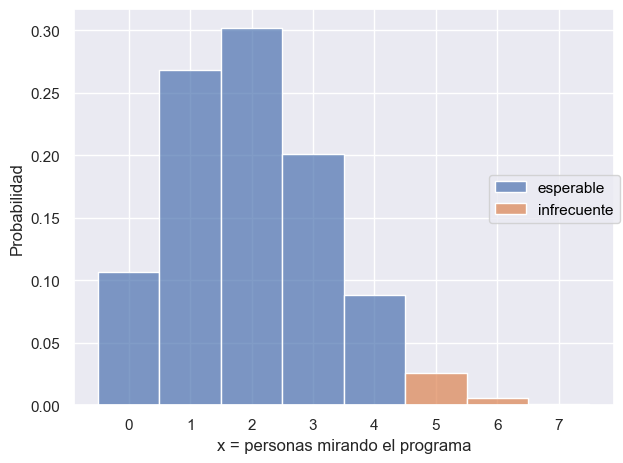

In [31]:
df_m = df_tv.round(3).set_index('x')
print(df_m)
# Añadir una columna de color
df_m['Miembros'] = ['esperable' if i <= 4 else 'infrecuente' for i in df_tv['x']]

# Crear la figura y los ejes usando seaborn.objects
hist = (
    so.Plot(df_m, x='x', y='p', color='Miembros')
    .add(so.Bars())
    .label(x="x = personas mirando el programa", y="Probabilidad", color="")
)

# Mostrar el gráfico , color = df_miembros['x'][df_miembros['x'] < 8]
hist.show()

**Resultados infrecuentes:**
+ La regla del intervalo nos dice que los resultados infrecuentes son aquellos con una probabilidad acumulada menor al 5%.
+ Se utiliza la probabilidad acumulada porque aunque los resultados son muy poco probables, siguen teniendo una probabilidad.
    + Estamos hablando de una baja probabilidad de 5 o 6 o 7 o 8 o 9 o 10 de un grupo de 10 personas veam el programa.
    + La probabilidad acumulada (['p-acu'] ) aumenta mucho al principio pero casi nada al pasar 4 personas.
        + Esta probabilidad se hace significativa (> 5% cuando x < 5)
    + La probabilidad acumulada invertida (['p-acr']) aumenta abruptamente a partir de 4 personas (desde 10 a 0).
    + Se ve como al llegar a 4 hogares ya se cubre el 95% de los casos más probables.

### Analisis de riesgo
#### ¿4 personas o más con dolor implica riesgos de efectos no deseados?
+ ¿Que la probabilidad de provocar dolor sea significativa hasta 3 personas implica riesgo? 
+ ¿Que la probabilidad de provocar dolor en 4 o más personas sea infrecuente significa que no hay riesgo?

In [40]:
# Revisamos las probabilidades acumuladas untilzando el criterio el criterio visto hasta ahora:
# La candidad de miembros m-e es excepcionalmente bajo si P(x o menos) <= 0,05
df_m[['p', 'p-acu','Miembros']]

,p,p-acu,Miembros
x,,,
0,0.107,0.107,esperable
1,0.268,0.376,esperable
2,0.302,0.678,esperable
3,0.201,0.879,esperable
4,0.088,0.967,esperable
5,0.026,0.994,infrecuente
6,0.006,0.999,infrecuente
7,0.001,1.000,infrecuente
8,0.000,1.000,infrecuente


**Observación**
Como se ve en la tabla y en la grafica la cantindad de personas con dolor esperable es no mayor a 3:
+ Si nos remitimos a la tabla obtenemos el siguiente resultado:
    + P(3 o menos personas con dolor de cabeza de un total de 6) =
    + P(3 o 2 o 1 o 0) = 0.063
    + P(3) + P(2) + P(1) + P(0) = 1 - P(4) + P(5) + P(6) 
    + 1 + 0.666 + 0.264 + 0.001 + 0 + 0 + 0 + 0 =
    + P(3 o menos personas con dolor de cabeza de un total de 6) = **0.063**

**Interpretación**
+ **3** miembros es una cantidad esperable de miembros y no es un número excepcionalmente bajo.
+ Una selección y composición con 3 miembros como esta, **no implica necesariamente un medicamento con efectos no deseados**.
+ Una selección y composición con 3 miembros como esta, **si implica un riesgo para la salud que amerite evitar este medicamento**.

# Preguntas aisladas
#### Calcule la probabilidad de que ninguno de los hogares esté sintonizando 60 minutos.

In [38]:
n = 10  # Número de sujetos
p = 0.20  # Probabilidad de mirar el programa
mirando = 0
probabilidad_mirando = 0
x = 0

for x in range(mirando + 1):
  probabilidad_x = binom.pmf(x, n, p)
  probabilidad_mirando += probabilidad_x

print(f"Probabilidad de al menos {mirando} sujetos: {probabilidad_mirando}")
print(f"Esta probabilidad debe coincidir con la que se calculó al construir la tabla.")

Probabilidad de al menos 0 sujetos: 0.10737418240000006
Esta probabilidad debe coincidir con la que se calculó al construir la tabla.


#### Calcule la probabilidad de a lo sumo uno de los hogares esté sintonizando 60 minutos.

In [41]:
n = 10  # Número de sujetos
p = 0.20  # Probabilidad de mirar el programa
mirando = 1
probabilidad_mirando = 0
x = 0

for x in range(mirando + 1):
  probabilidad_x = binom.pmf(x, n, p)
  probabilidad_mirando += probabilidad_x

print(f"Probabilidad de a lo sumo {mirando} sujetos: {probabilidad_mirando}")
print(f"Esta probabilidad debe coincidir con la que se calculó al construir la tabla.")

Probabilidad de al menos 1 sujetos: 0.37580963840000003
Esta probabilidad debe coincidir con la que se calculó al construir la tabla.


#### Calcule la probabilidad de que al menos uno de los hogares esté sintonizando el programa.

In [44]:
n = 10  # Número de sujetos
p = 0.20  # Probabilidad de mirar el programa
mirando = 1
probabilidad_mirando = 0
x = 1

for x in range(1, n + 1):
  probabilidad_x = binom.pmf(x, n, p)
  probabilidad_mirando += probabilidad_x

print(f"Probabilidad de al menos {mirando} sujetos: {probabilidad_mirando}")
print(f"Esta probabilidad debe coincidir con la que se calculó al construir la tabla.")

Probabilidad de al menos 1 sujetos: 0.8926258175999997
Esta probabilidad debe coincidir con la que se calculó al construir la tabla.


#### Si a lo sumo un hogar está sintonizando 60 minutos, ¿será incorrecto el valor de un índice de audiencia del 20%? ¿Por qué?
No. No sería incorrecto porque el valor esperado es 2 y allí está el valor máximo de probabilidad.

__________________________________________________________________________________________________________________________